MLS Case Study PCA

**Context**:
In this case study, we will use the Education dataset which contains information on educational institutes in the USA. The data has various attributes such as number of applications received, enrollments, faculty education, financial aspects and graduation rate of each institute.

**Objective**:
The objective of this problem is to reduce the number of features by using the dimensionality reduction techniques like PCA and extract insights

**Data**:

- Names: names of various universities and colleges
- Apps: # of applications received
- Accept: # of applications accepted
- Enroll: # of new students enrolled
- Top10perc: percentage of new students from 10% of higher secondary class
- Top25perc: percentage of new students from 25% of higher secondary class
- F_Undergrad: Number of full-time undergraduate students
- P_Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is out-of-state tuition
- Room_Board: Cost of room and board
- Books: estimated book costs for a student
- Personal: estimated personal spending for a student
- PhD: percentage of faculties with a Ph.D
- Terminal: percentage of faculties with terminal degree
- S_F Ratio: student/faculty ratio
- perc_alumi: percentage of alumi who donate
- Expend: the instructional expenditure per student
- Grad_Rate: graduation rate

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
data = pd.read_csv('./data/Education_Post_12th_Standard.csv')
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### **Data Analysis**

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


### **Checking the distribution of the variables and the outliers**

Apps
Skew: 3.7237499684473048


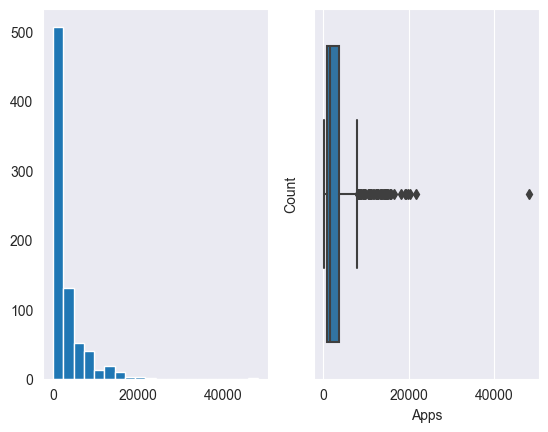

Accept
Skew: 3.417727343007034


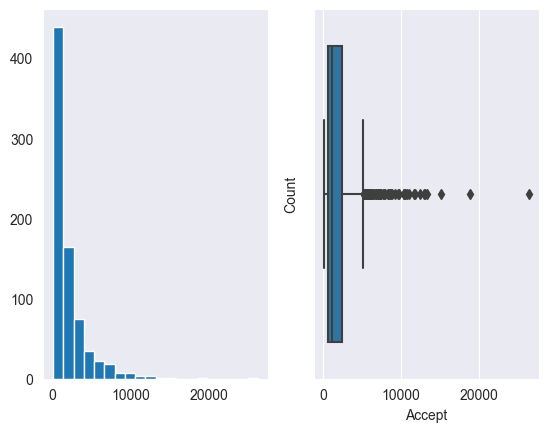

Enroll
Skew: 2.6904646541429256


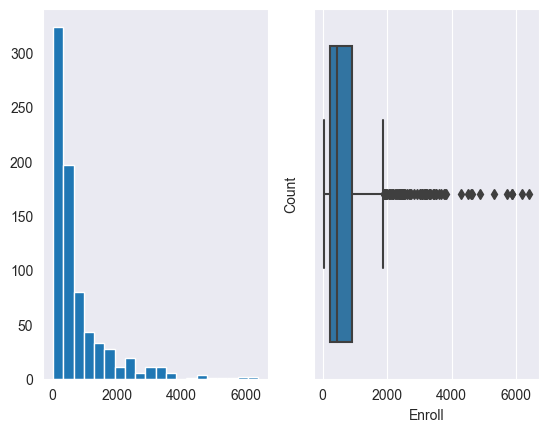

Top10perc
Skew: 1.4132167808936722


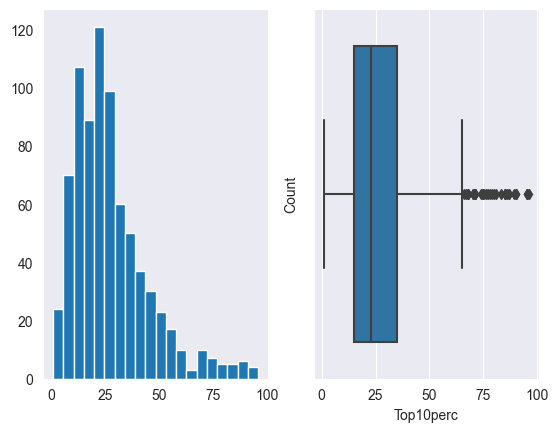

Top25perc
Skew: 0.25934035274548295


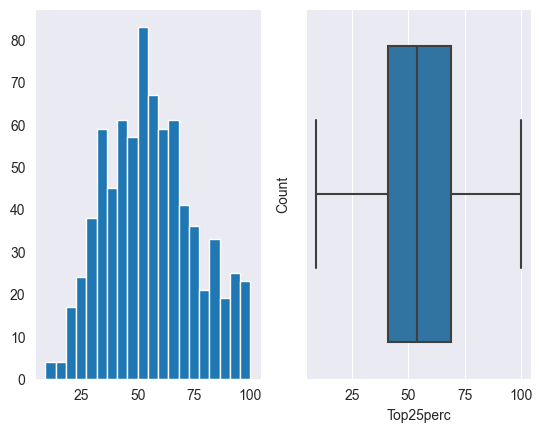

F_Undergrad
Skew: 2.610457947612077


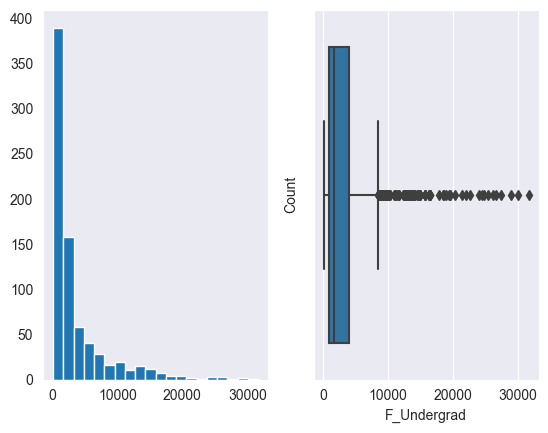

P_Undergrad
Skew: 5.692353166713656


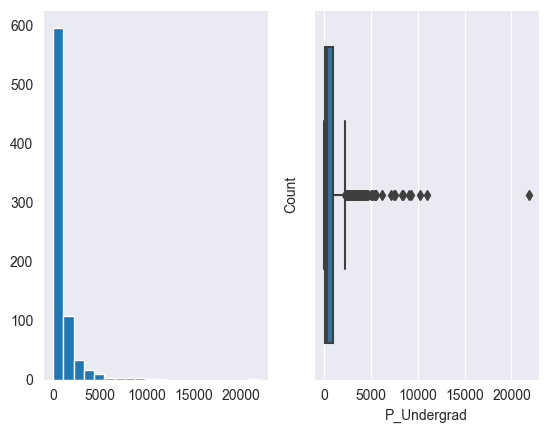

Outstate
Skew: 0.5092779741683738


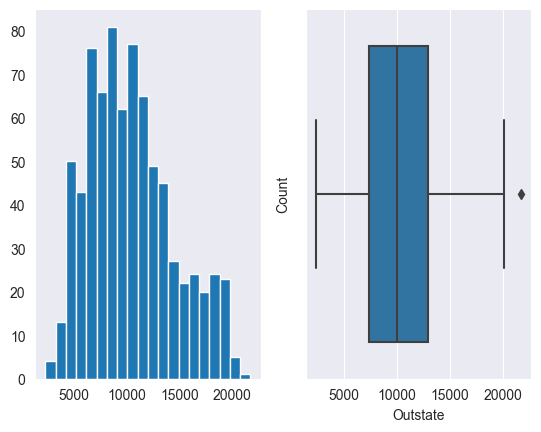

Room_Board
Skew: 0.4773555794843242


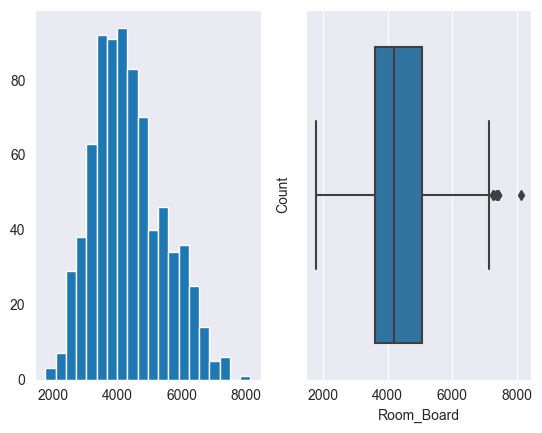

Books
Skew: 3.4850247364230884


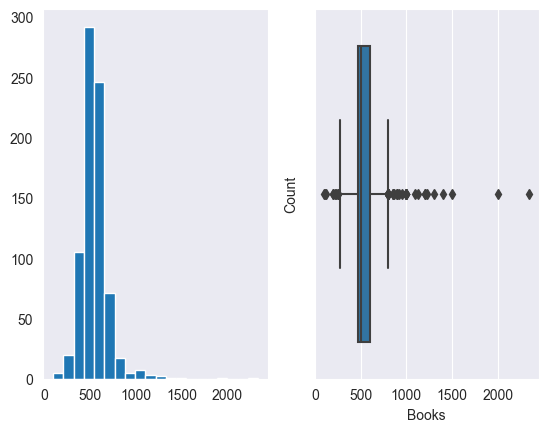

Personal
Skew: 1.7424965368737007


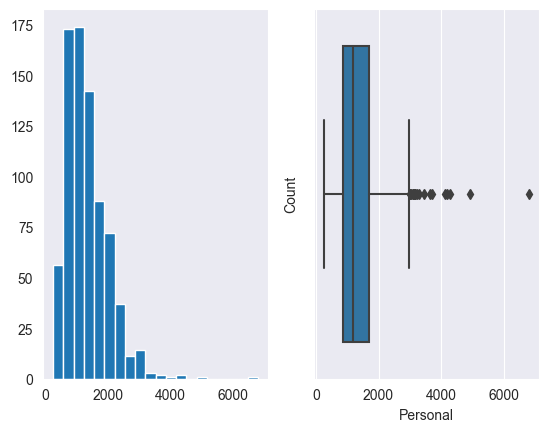

PhD
Skew: -0.768170111986763


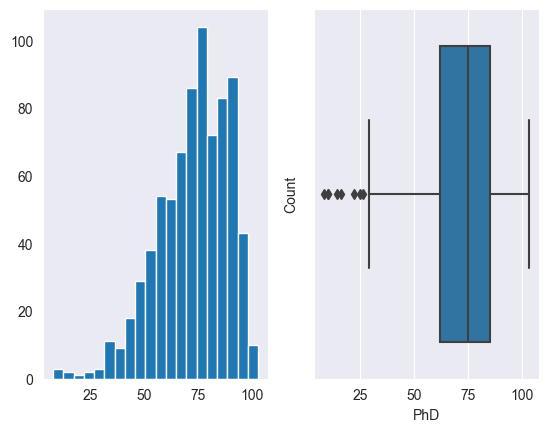

Terminal
Skew: -0.8165423363083599


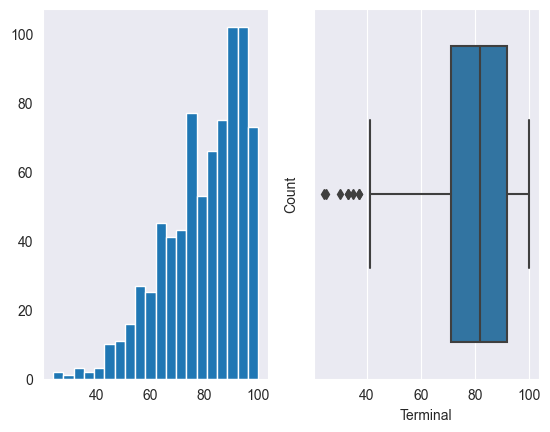

S_F_Ratio
Skew: 0.6674353641877591


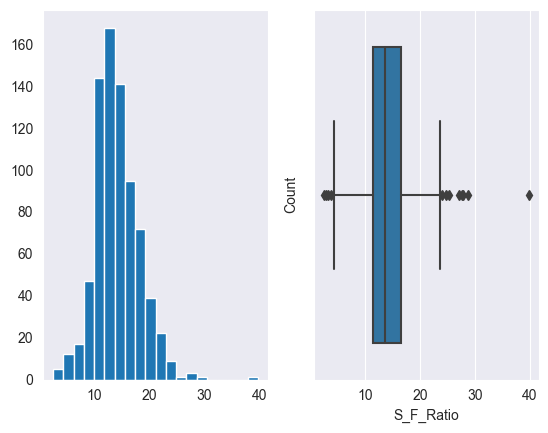

perc_alumni
Skew: 0.6068912183690094


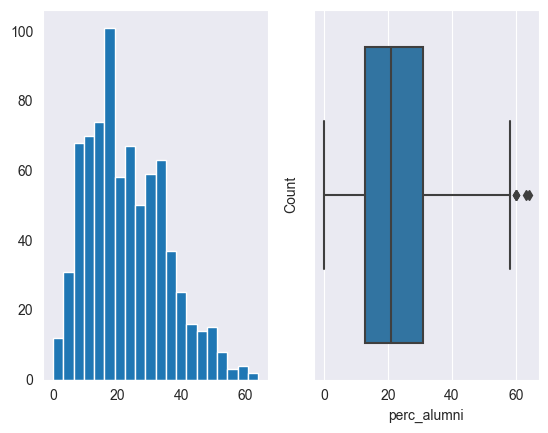

Expend
Skew: 3.4593217150289033


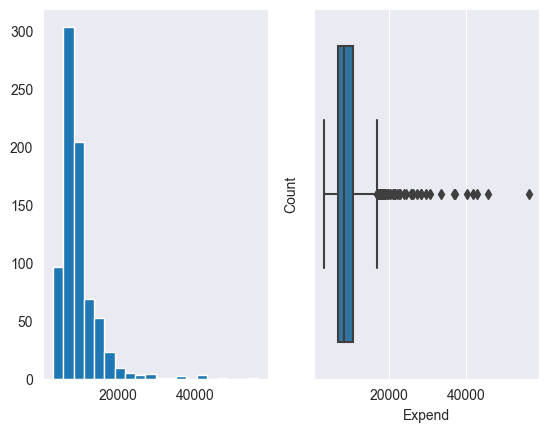

Grad_Rate
Skew: -0.11377729088461509


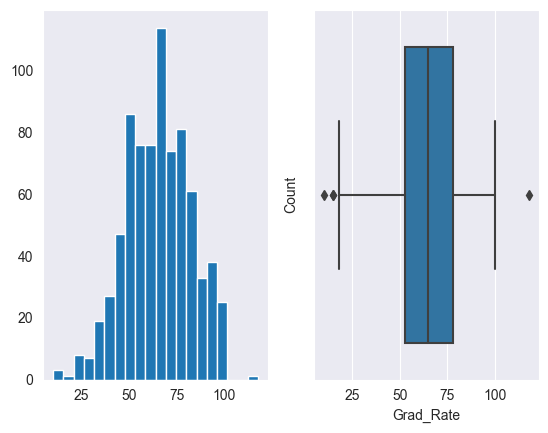

In [45]:
for col in data.columns[1:]:
    print(col)
    print('Skew:', data[col].skew())
    plt.subplot(1, 2, 1)
    data[col].hist(bins=20, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.ylabel('Count')
    plt.show()

In [46]:
data[(data.PhD>100) | (data.Grad_Rate>100)]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,Texas A&M University at Galveston,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [47]:
data.loc[582,"PhD"]=100
data.loc[95,"Grad_Rate"]=100

In [48]:
data.drop(['Names'], axis=1, inplace=True)

Scaling the data

In [49]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775949,-1.339146,1.746877,-0.706073,-0.994781,-1.487051
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.021068,-0.319632,-0.199632,0.666685,-0.090290,1.026424
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346786,-0.319632,0.078441,-0.221570,-0.256241,-0.960975
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.431175,1.107689,-2.095582,2.120194,5.887971,1.961671


### **Principal Component Analysis**

In [50]:
n_components = data_scaled.shape[1]

pca = PCA(n_components=n_components, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled), columns=data_scaled.columns)
data_pca1

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-1.593266,0.764607,-0.107060,-0.928681,-0.738979,-0.305103,0.639973,-0.873641,0.094534,0.052944,0.398840,-0.089344,-0.050615,0.180703,0.001674,-0.093432,0.093376
1,-2.193362,-0.581284,2.296629,3.587686,1.037785,-0.152909,0.263006,0.050182,1.120501,0.941130,-0.209081,0.098736,-0.250232,-0.741050,0.103980,-0.049794,-0.174007
2,-1.430551,-1.094598,-0.435461,0.688978,-0.372722,-0.954627,-0.245467,0.307045,-0.104452,0.637848,-0.156856,-0.346364,0.098029,0.225370,-0.022207,-0.003397,0.004114
3,2.857891,-2.626056,0.136121,-1.279351,-0.174330,-1.066654,-1.262575,-0.159711,0.372947,0.473619,-0.428548,0.682561,-0.074964,-0.007195,-0.072963,-0.190402,-0.174622
4,-2.217343,0.020351,2.382812,-1.106215,0.691579,-0.000224,-2.160878,-0.645014,-0.170606,0.376212,-0.159646,-0.054891,0.263895,-0.622582,-0.273720,0.012600,0.049645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-3.331877,1.216020,-0.382920,0.116750,0.776486,0.311989,-0.165859,0.346227,0.546553,0.874581,0.445388,-0.030498,0.271952,-0.395688,0.048949,0.069725,0.012510
773,0.202842,-0.687321,0.053747,0.555232,0.370817,0.376331,0.849616,0.634481,-0.067957,-0.320006,0.017130,0.204426,-0.090903,-0.336196,0.081175,-0.112138,-0.047369
774,-0.734117,-0.077759,0.000171,0.058964,-0.515758,0.470364,-1.315968,-0.140485,0.207483,0.302047,-0.475184,0.445783,0.082780,-0.044736,0.067993,-0.231168,-0.099580
775,7.923697,-2.057366,2.078119,0.850451,-0.952035,-2.066705,0.088002,-0.551528,0.083282,0.938010,2.235628,1.365214,0.075687,-0.072355,0.353353,0.303746,0.334955


In [51]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.32046058, 0.26342915, 0.06901114, 0.05906272, 0.05489027,
       0.04982847, 0.0355726 , 0.03453611, 0.03116758, 0.02370464,
       0.01840343, 0.01295305, 0.00985822, 0.00844107, 0.00517124,
       0.00215728, 0.00135244])

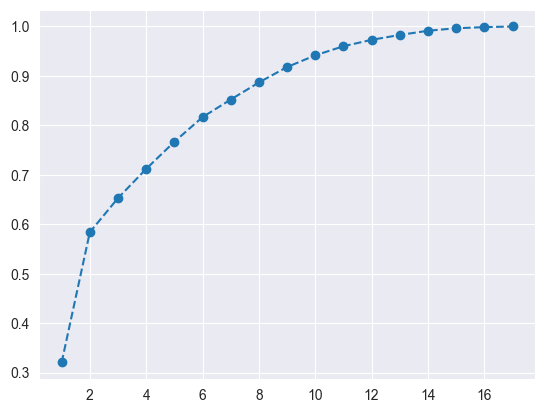

In [52]:
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

In [54]:
sum=0
for ix, i in enumerate(exp_var):
    sum+=i
    if (sum>=0.7):
        print('Number of components that explain 70% of variance', ix+1)
        break;

Number of components that explain 70% of variance 4


In [56]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']
data_pca = pd.DataFrame(pca.components_[:4, :], index=pc_comps, columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.248183,0.332026,-0.061615,0.282569
Accept,0.206970,0.372491,-0.099764,0.269149
Enroll,0.175695,0.404002,-0.082229,0.162611
Top10perc,0.354244,-0.081867,0.034764,-0.052469
Top25perc,0.343943,-0.044259,-0.024700,-0.111389
F_Undergrad,0.154038,0.417901,-0.060971,0.100948
P_Undergrad,0.026022,0.315112,0.139028,-0.158473
Outstate,0.294936,-0.249149,0.047352,0.133122
Room_Board,0.249048,-0.137350,0.150279,0.186480
Books,0.064583,0.056482,0.678096,0.079488
